In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/crowley-1996.csv')
print(df)

     id condition  m1  m2  m3  m4  m5  m6
0   101  resident   3   3   3   3   3   3
1   102  resident   3   3   3   3   3   3
2   103  resident   3   3   3   3   2   2
3   104  resident   3   3   3   3   2   1
4   105  resident   3   3   3   2   2   1
..  ...       ...  ..  ..  ..  ..  ..  ..
59  228   control   2   1   1   1   1   1
60  229   control   1   1   1   1   1   1
61  230   control   1   1   1   1   1   1
62  231   control   1   1   1   1   1   1
63  232   control   1   1   1   1   1   1

[64 rows x 8 columns]


In [5]:
df['m1']

0     3
1     3
2     3
3     3
4     3
     ..
59    2
60    1
61    1
62    1
63    1
Name: m1, Length: 64, dtype: int64

## Experimental design

Independant variables / factors:
* month {1, 2, ... ,6}
* dog status {'resident', 'control'} (control means the dog is only visiting)
Dependant variable (i.e. what is measured):
* mood {1, 2, 3}

## Analysis

### Reproduction figure 2

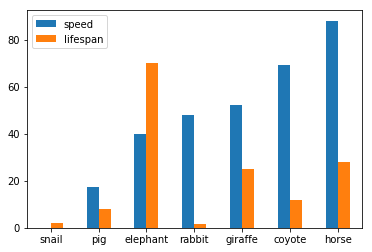

In [6]:
# From pandas documentation
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df_demo = pd.DataFrame({'speed': speed,
                        'lifespan': lifespan}, index=index)
ax = df_demo.plot.bar(rot=0)

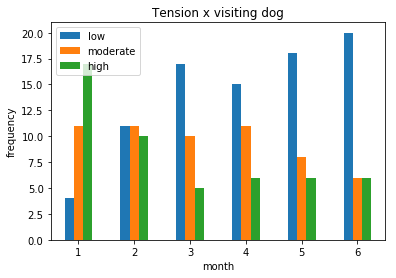

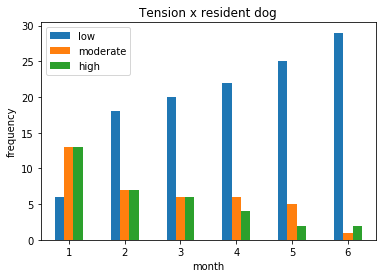

In [37]:
# Number of people 'low' for the month 1, month 2, etc. for visiting

dog_status = ['control', 'resident']

moods = {'low': 1, 'moderate': 2, 'high': 3}
n_months = 6

index = list(range(1, n_months+1))

#low = [] 
#moderate = []
#high = []

for ds in dog_status:

    data = {}
    for mood_label in moods.keys():
        data[mood_label] = []

    is_ds = df['condition'] == ds
    
    # sum_m1 = sum(df[is_low&is_control]['m1'])
    # sum_m2 = sum(df[is_low&is_control]['m2'])
    # low.append(sum_m1)
    # low.append(sum_m2)

    for i in range(n_months):
        key_month = 'm' + str(i+1)

        # is_low = df[key_month] == 1
        # sum_low = sum(df[is_low&is_control][key_month])
        # low.append(sum_low)

        for (mood_label, mood_value) in moods.items():

            is_mood = df[key_month] == mood_value
            count_mood = len(df[is_mood & is_ds][key_month])

            data[mood_label].append(count_mood)

            #if mood == 1:
            #    low.append(sum_actual_mood)
            #elif mood == 2:
            #    moderate.append(sum_actual_mood)
            #else:
            #    high.append

    if ds == 'resident':
        condition_label = ds
    else:
        condition_label = 'visiting'
    
    title = f'Tension x {condition_label} dog'
    
    df_fig = pd.DataFrame(data, index=index)
    ax = df_fig.plot.bar(rot=0)
    ax.set_xlabel('month')
    ax.set_ylabel('frequency')
    ax.set_title(title)
    plt.show()

In [16]:
# Number of people 'low' for the month 1, month 2, etc. for visiting

dog_status = ['control', 'resident']

moods = {'low': 1, 'moderate': 2, 'high': 3}
n_months = 6

index = list(range(1, n_months+1))

#low = [] 
#moderate = []
#high = []

for ds in dog_status:

    mood_sums = {}
    mood_mean = {}
    for mood_label in moods.keys():
        mood_sums[mood_label] = []
        mood_mean[mood_lable] = []

    is_ds = df['condition'] == ds
    
    # sum_m1 = sum(df[is_low&is_control]['m1'])
    # sum_m2 = sum(df[is_low&is_control]['m2'])
    # low.append(sum_m1)
    # low.append(sum_m2)

    for i in range(n_months):
        key_month = 'm' + str(i+1)

        # is_low = df[key_month] == 1
        # sum_low = sum(df[is_low&is_control][key_month])
        # low.append(sum_low)

        for (mood_label, mood_value) in moods.items():

            is_mood = df[key_month] == mood_value
            sum_mood = sum(df[is_mood & is_ds][key_month])
            mean_mood = np.mean(df[is_ds])[key_month])

            mood_sums[mood_label].append(sum_mood)
            mood_mean[mood_lable].append(mean_mood)

            #if mood == 1:
            #    low.append(sum_actual_mood)
            #elif mood == 2:
            #    moderate.append(sum_actual_mood)
            #else:
            #    high.append

    if ds == 'resident':
        condition_label = ds
    else:
        condition_label = 'visiting'
    
    title = f'Tension x {condition_label} dog'
    
    df_fig = pd.DataFrame(mood_sums, index=index)
    ax = df_fig.plot.bar(rot=0)
    ax.set_xlabel('month')
    ax.set_ylabel('frequency')
    ax.set_title(title)
    plt.show()

SyntaxError: invalid syntax (<ipython-input-16-c63a20cb13e0>, line 40)

In [35]:
class Car:
    
    def __init__(self, color):
        self.color = color
        # print(f"I construct a {self.color} car")
    
    def run(self):
        
        print(f"my {self.color} is now running")

my_car = Car('red')
my_car.run()

# your_car = Car('blue')
# print(your_car.color)

# myobject.some_method()


my red is now running


NameError: name 'run' is not defined

In [23]:
#f"a is equal to {a} and b is equal to {b}" = "a is equal to " + str(a) + " and b is equal " + str(b)


a = 2
my_string = f"a is equal to {a}"
print(my_string)

a is equal to 2


In [6]:
### Overal Mean Value (Resident & Control) by the Number of Months 

In [7]:
np.mean(df['m1'])

2.3125

In [8]:
np.mean(df['m2'])

1.8125

In [9]:
np.mean(df['m3'])

1.59375

In [10]:
np.mean(df['m4'])

1.578125

In [11]:
np.mean(df['m5'])

1.453125

In [12]:
np.mean(df['m6'])

1.359375

In [13]:
np.mean(df['m1', 'm2', 'm3', 'm4', 'm5', 'm6'])

KeyError: ('m1', 'm2', 'm3', 'm4', 'm5', 'm6')

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

# Standard Diviation Value (Resident & Control) by the Number of Months 

In [ ]:
np.std(df['m1'])

In [ ]:
np.std(df['m2'])

In [ ]:
np.std(df['m3'])

In [ ]:
np.std(df['m4'])

In [ ]:
np.std(df['m5'])

In [ ]:
np.std(df['m6'])

# Mean Variable (Resident) by the Number of Months 

In [ ]:
#Isolate resident
is_resident = df['condition'] == 'resident'
is_resident

In [ ]:
#Produce table for resident 
df[is_resident]

In [ ]:
# np.mean(df[df['condition']=='resident']['m1'])   =   np.mean(df[is_resident]['m1'])

In [ ]:
np.mean(df[is_resident]['m1'])

In [ ]:
np.mean(df[is_resident]['m2'])

In [ ]:
np.mean(df[is_resident]['m3'])

In [ ]:
np.mean(df[is_resident]['m4'])

In [ ]:
np.mean(df[is_resident]['m5'])

In [ ]:
np.mean(df[is_resident]['m6'])

# Standard Deviation Variable (Resident) by the Number of Months 

In [ ]:
np.std(df[is_resident]['m1'])

In [ ]:
np.std(df[is_resident]['m2'])

In [ ]:
np.std(df[is_resident]['m3'])

In [ ]:
np.std(df[is_resident]['m4'])

In [ ]:
np.std(df[is_resident]['m5'])

In [ ]:
np.std(df[is_resident]['m6'])

# Mean Variable (Control) by the Number of Months 

In [ ]:
#Isolate control
is_control = df['condition'] == 'control'
is_control

In [ ]:
#Produce table for resident 
df[is_control]

In [ ]:
np.mean(df[is_control]['m1'])

In [ ]:
np.mean(df[is_control]['m2'])

In [ ]:
np.mean(df[is_control]['m3'])

In [ ]:
np.mean(df[is_control]['m4'])

In [ ]:
np.mean(df[is_control]['m5'])

In [ ]:
np.mean(df[is_control]['m6'])

# Standard Deviation Variable (Control) by the Number of Months 

In [ ]:
np.std(df[is_control]['m1'])

In [ ]:
np.std(df[is_control]['m2'])

In [ ]:
np.std(df[is_control]['m3'])

In [ ]:
np.std(df[is_control]['m4'])

In [ ]:
np.std(df[is_control]['m5'])

In [ ]:
np.std(df[is_control]['m6'])

In [ ]:
np.std(df[is_control]['m1, m2, m3, m4, m5, m6'])

In [ ]:
# b) How many participants were there in total? How many participants in each home?

In [ ]:
len(df["id"])

In [ ]:
len(df["resident"])

In [ ]:
len(df["control"])